In [2]:
import numpy as np #for algebric calculations
import pandas as pd #essential for data reading,writing etc
import seaborn as sns #visualization library
import plotly.express as px #ploting parameter's
import plotly.express
import matplotlib #visualization library.
import matplotlib.pyplot as plt #visualization library.
import sys #for System-specific parameters and functions.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7) #plotting parameters size's.
import warnings
warnings.filterwarnings('ignore')

# display the version of import libraries

print('Python : {}'.format(sys.version[0:5]))
print('Numpy : {}'.format(np.__version__))
print('Pandas : {}'.format(pd.__version__))
print('Matplotlib : {}'.format(matplotlib.__version__))
print('Seaborn : {}'.format(sns.__version__))
print('Plotly.Express : {}'.format(plotly.__version__))

Python : 3.9.1
Numpy : 1.23.1
Pandas : 1.4.3
Matplotlib : 3.5.2
Seaborn : 0.12.2
Plotly.Express : 5.9.0


## IMPORT DATASET

In [3]:
# Define the path of CSV file & import the dataset.

df=pd.read_csv('naukri_com-job_sample.csv') 

In [4]:
# Display the first 10 columns.

df.head(5)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


In [5]:
# Display the number of rows and columns in the dataset.

nrow,ncol=df.shape
print(f'There are {nrow} rows and {ncol} colunms in the dataset')


There are 22000 rows and 14 colunms in the dataset


In [6]:
#The total number of elements.
#This is equal to the row_count * column_coun.

print(df.shape[0] * df.shape[1])

308000


In [7]:
# Display the information about DataFrame including the index dtype, columns and etc.  

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              21996 non-null  object 
 1   education            20004 non-null  object 
 2   experience           21996 non-null  object 
 3   industry             21995 non-null  object 
 4   jobdescription       21996 non-null  object 
 5   jobid                22000 non-null  int64  
 6   joblocation_address  21499 non-null  object 
 7   jobtitle             22000 non-null  object 
 8   numberofpositions    4464 non-null   float64
 9   payrate              21903 non-null  object 
 10  postdate             21977 non-null  object 
 11  site_name            3987 non-null   object 
 12  skills               21472 non-null  object 
 13  uniq_id              22000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.3+ MB


In [8]:
count_missing = df.isnull().sum()
percent_missing =  count_missing* 100 / df.shape[0]
missing_value_df = pd.DataFrame({'count_missing': count_missing,
                                 'percent_missing': percent_missing})

missing_value_df.style.background_gradient(cmap='Spectral')

,count_missing,percent_missing
company,4,0.018182
education,1996,9.072727
experience,4,0.018182
industry,5,0.022727
jobdescription,4,0.018182
jobid,0,0.000000
joblocation_address,501,2.277273
jobtitle,0,0.000000
numberofpositions,17536,79.709091
payrate,97,0.440909


In [75]:
unique_df = pd.DataFrame([[df[i].nunique()]for i in df.columns], columns=['Unique Values'], index=df.columns)
unique_df

,Unique Values
company,8469
education,2355
industry,63
jobdescription,21063
jobid,21910
joblocation_address,2148
jobtitle,17564
numberofpositions,84
site_name,1
skills,45


In [9]:
unique_df = pd.DataFrame([[df[i].nunique(), df[i].unique()]for i in df.columns],
                         columns=['Count','unique'],
                         index=df.columns)
unique_df.style.background_gradient(cmap='magma')

## Data Cleaning Processing

Payrate Spliting Processing

In [10]:
# split method to split payrate min to max

pay_split = df['payrate'].str[0:-1].str.split('-', expand=True)
pay_split.head(10)

,0,1,2,3,4,5,6
0,"1,50,000","2,25,000 P.",None,None,None,None,None
1,"1,50,000","2,50,000 P.A. 2000",None,None,None,None,None
2,Not Disclosed by Recruite,None,None,None,None,None,None
3,Not Disclosed by Recruite,None,None,None,None,None,None
4,Not Disclosed by Recruite,None,None,None,None,None,None
5,Not Disclosed by Recruite,None,None,None,None,None,None
6,"3,00,000","6,50,000 P.",None,None,None,None,None
7,Not Disclosed by Recruite,None,None,None,None,None,None
8,"1,00,000","2,00,000 P.",None,None,None,None,None
9,Not Disclosed by Recruite,None,None,None,None,None,None


In [11]:
#remove space in left and right
pay_split[0] =  pay_split[0].str.strip()

#remove comma 
pay_split[0] = pay_split[0].str.replace(',', '')

#remove all character in two condition
# 1 remove if only character
# 2 if start in number remove after all character
pay_split[0] = pay_split[0].str.replace(r'\D.*', '')

#display 
pay_split[0].head(10)

0    150000
1    150000
2          
3          
4          
5          
6    300000
7          
8    100000
9          
Name: 0, dtype: object

In [12]:
#remove space in left and right 
pay_split[1] =  pay_split[1].str.strip()

#remove comma 
pay_split[1] = pay_split[1].str.replace(',', '')

#remove all character in two condition
# 1 remove if only character
# 2 if start in number remove after all character
pay_split[1] = pay_split[1].str.replace(r'\D.*','')

#display 
pay_split[1].head(10)

0    225000
1    250000
2      None
3      None
4      None
5      None
6    650000
7      None
8    200000
9      None
Name: 1, dtype: object

In [13]:
pay_split[0] = pd.to_numeric(pay_split[0], errors='coerce')
pay_split[1] = pd.to_numeric(pay_split[1], errors='coerce')

In [14]:
pay=pd.concat([pay_split[0], pay_split[1]], axis=1, sort=False)

In [15]:
# rename the columns into min payrate and max payrate.
pay.rename(columns={0:'min_pay', 1:'max_pay'}, inplace=True )
pay.head()

,min_pay,max_pay
0,150000.0,225000.0
1,150000.0,250000.0
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [16]:
# min and max payarte store the value in the dataframe.

df=pd.concat([df, pay], axis=1, sort=False)

In [17]:
df.head(5)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min_pay,max_pay
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN


Experience Spliting Processing

In [18]:
# spliting the experience into min experience to max experience.

experience_split = df['experience'].str[0:-1].str.split('-', expand=True)
experience_split.head()

,0,1,2
0,0,1 yr,None
1,0,0 yr,None
2,4,8 yr,None
3,11,15 yr,None
4,6,8 yr,None


In [19]:
#remove space in left and right 
experience_split[0] =  experience_split[0].str.strip()

#remove comma 
experience_split[0] = experience_split[0].str.replace('yr', '')

#remove all character in two condition
# 1 remove if only character
# 2 if start in number remove after all character
experience_split[0] = experience_split[0].str.replace(r'yr', '')

#display 
experience_split[0].head()

0     0
1     0
2     4
3    11
4     6
Name: 0, dtype: object

In [20]:
#remove space in left and right 
experience_split[1] =  experience_split[1].str.strip()

#remove comma 
experience_split[1] = experience_split[1].str.replace('yr', '')

#remove all character in two condition
# 1 remove if only character
# 2 if start in number remove after all character
experience_split[1] = experience_split[1].str.replace(r'yr', '')

#display 
experience_split[1].head()

0     1 
1     0 
2     8 
3    15 
4     8 
Name: 1, dtype: object

In [21]:
experience_split[0] = pd.to_numeric(experience_split[0], errors='coerce')
experience_split[1] = pd.to_numeric(experience_split[1], errors='coerce')

In [22]:
experience=pd.concat([experience_split[0], experience_split[1]], axis=1, sort=False)

In [23]:
# rename the cloumns to min and max experience

experience.rename(columns={0:'min_experience', 1:'max_experience'}, inplace=True)
experience.head()

,min_experience,max_experience
0,0.0,1.0
1,0.0,0.0
2,4.0,8.0
3,11.0,15.0
4,6.0,8.0


In [24]:
# store the min and max experience in the dataframe.

df=pd.concat([df, experience], axis=1, sort=False)

In [25]:
#displat max and min experience

df.head(5)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min_pay,max_pay,min_experience,max_experience
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0.0,1.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0.0,0.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4.0,8.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN,11.0,15.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN,6.0,8.0


View Payrate and Experience Average

In [26]:
# Display average payrate and average experience.
# min experience and max experience define the average experience.
# min payrate and max payrate define the average payrate.

df['avg_payrate']=(df['min_pay'].values + df['max_pay'].values)/2
df['avg_experience']=(df['min_experience'].values + df['max_experience'].values)/2
df.head(5)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min_pay,max_pay,min_experience,max_experience,avg_payrate,avg_experience
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0.0,1.0,187500.0,0.5
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0.0,0.0,200000.0,0.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4.0,8.0,NaN,6.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN,11.0,15.0,NaN,13.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN,6.0,8.0,NaN,7.0


Feature Engineering Of Date Variable

In [27]:
df['postdate'].dtypes

dtype('O')

In [28]:
# parse the dates, currently coded as strings, into datetime format

df['postdate'] = pd.to_datetime(df['postdate'])

In [29]:
# extract year from date

df['Year'] = df['postdate'].dt.year
df['Year'].head(5)

0    2016.0
1    2016.0
2    2016.0
3    2016.0
4    2016.0
Name: Year, dtype: float64

In [30]:
# extract month from date

df['Month'] = df['postdate'].dt.month
df['Month'].head(5)

0     5.0
1     5.0
2    10.0
3    10.0
4    10.0
Name: Month, dtype: float64

In [31]:
df['Month'].tail(5)

21995    11.0
21996    11.0
21997    11.0
21998    11.0
21999    11.0
Name: Month, dtype: float64

In [32]:
# extract day from date

df['Day'] = df['postdate'].dt.day
df['Day'].head(5)

0    21.0
1    21.0
2    13.0
3    13.0
4    13.0
Name: Day, dtype: float64

In [33]:
df['Day'].tail(5)

21995    25.0
21996    24.0
21997    25.0
21998    27.0
21999    25.0
Name: Day, dtype: float64

In [34]:
# drop the original Date variable

df.drop('postdate', axis=1, inplace = True)

In [35]:
df.head(5)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,...,uniq_id,min_pay,max_pay,min_experience,max_experience,avg_payrate,avg_experience,Year,Month,Day
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",...,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0.0,1.0,187500.0,0.5,2016.0,5.0,21.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",...,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0.0,0.0,200000.0,0.0,2016.0,5.0,21.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,...,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4.0,8.0,NaN,6.0,2016.0,10.0,13.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,...,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN,11.0,15.0,NaN,13.0,2016.0,10.0,13.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,...,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN,6.0,8.0,NaN,7.0,2016.0,10.0,13.0


Location Spliting Processing

In [36]:
df['joblocation_address'].value_counts().head(10)

Bengaluru/Bangalore         3775
Mumbai                      2348
Bengaluru                   1453
Hyderabad / Secunderabad    1246
Chennai                     1204
Hyderabad                    936
Noida                        775
Delhi                        763
Gurgaon                      743
Mumbai , Mumbai              514
Name: joblocation_address, dtype: int64

In [37]:
replacements = {
   'joblocation_address': {
      r'(Bengaluru/Bangalore)':'Bangalore',
      r'Bengaluru':'Bangalore',
      r'Bangalore':'Bangalore',
      r'Bangalore Bangalore':'Bangalore',
      r'Hyderabad/Secunderabad':'Hyderabad',
      r'Mumbai , Mumbai':'Mumbai',
      r'Noida': 'Delhi',
      r'Delhi': 'Delhi',
      r'Gurgaon': 'Delhi',
      r'Delhi/NCR(National Capital Region)':'Delhi',
      r'Delhi/NCR(National Capital Region) ':'Delhi',
      r' Delhi/NCR(National Capital Region) ':'Delhi',
      r' Delhi/NCR(National Capital Region)':'Delhi',
      r'DELHI(NATIONAL CAPITAL REGION)':'Delhi',
      r'Delhi,Delhi':'Delhi',
      r'Noida/Greater Noida':'Delhi',
      r'Ghaziabad': 'Delhi',
      r'Delhi/NCR(National Capital Region),Gurgaon':'Delhi',
      r'NCR,NCR': 'Delhi',
      r'Delhi/NCR':'Delhi', 
      r'Bangalore,Bangalore / Bangalore':'Bangalore',
      r'Bangalore,karnataka': 'Bangalore',
      r'Delhi NCR':'Delhi',
      r'Delhi':'Delhi',
   }
}
df.replace(replacements, regex=True, inplace=True)
joblocation_address = df['joblocation_address'].value_counts()

In [38]:
# filter and find unique() cities from data set

df.joblocation_address = df.joblocation_address.str.upper()
new_location =df.joblocation_address.str.strip().str.split(",", expand = True)[0].str.split(" ", expand = True)[0].value_counts().reset_index()
new_location.columns = ["Location", "Job_Opportunities"]
new_location = new_location[:10]
new_location.style.background_gradient(cmap = "PuOr")

,Location,Job_Opportunities
0,BANGALORE,7984
1,DELHI,4028
2,MUMBAI,3704
3,HYDERABAD,2659
4,CHENNAI,1743
5,DELHI(NATIONAL,771
6,PUNE,97
7,AHMEDABAD,89
8,FARIDABAD,74
9,NAVI,59


In [39]:
# drop the original Date variable

df.drop('payrate', axis=1, inplace = True)

In [40]:
# drop the original Date variable

df.drop('experience', axis=1, inplace = True)

In [41]:
# drop the original Date variable

df.drop('uniq_id', axis=1, inplace = True)

In [42]:
# a general overview of data
# T means Transpose

df.describe().T

,count,mean,std,min,25%,50%,75%,max
jobid,22000.0,1.561171e+11,9.423956e+10,1.011600e+10,6.121650e+10,1.602169e+11,2.502166e+11,3.112155e+11
numberofpositions,4464.0,4.511694e+01,1.861972e+02,1.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01,2.000000e+03
min_pay,4679.0,4.503506e+05,5.612305e+05,8.000000e+00,1.500000e+05,2.500000e+05,5.000000e+05,5.500000e+06
max_pay,4940.0,7.342964e+05,7.559780e+05,1.000000e+00,3.000000e+05,5.000000e+05,9.000000e+05,8.000000e+06
min_experience,21885.0,3.600960e+00,3.100464e+00,0.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,2.600000e+01
max_experience,21884.0,7.117803e+00,3.923900e+00,0.000000e+00,5.000000e+00,7.000000e+00,9.000000e+00,3.000000e+01
avg_payrate,4641.0,6.148486e+05,6.442073e+05,9.000000e+00,2.500000e+05,3.750000e+05,7.500000e+05,6.500000e+06
avg_experience,21884.0,5.359395e+00,3.444409e+00,0.000000e+00,3.000000e+00,4.500000e+00,7.000000e+00,2.800000e+01
Year,21977.0,2.015751e+03,4.505767e-01,2.015000e+03,2.015000e+03,2.016000e+03,2.016000e+03,2.017000e+03
Month,21977.0,7.224189e+00,4.062145e+00,1.000000e+00,3.000000e+00,8.000000e+00,1.100000e+01,1.200000e+01


In [43]:
#Dataset Summary statistics - categorical variables

df.describe(include = ['object']).T

,count,unique,top,freq
company,21996,8469,Indian Institute of Technology Bombay,403
education,20004,2355,"UG: Any Graduate - Any Specialization, Graduat...",2015
industry,21995,63,IT-Software / Software Services,9216
jobdescription,21996,21063,Job Description Send me Jobs like this Adver...,121
joblocation_address,21499,2148,BANGALORE,5228
jobtitle,22000,17564,Business Development Executive,93
site_name,3987,1,www.naukri.com,3987
skills,21472,45,IT Software - Application Programming,5989


## Bivariate Analysis

## Types of Variables

Categorical Variables      Numerical Variables

categorical Variables

In [44]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)

There are 8 categorical variables

The categorical variables are :
 ['company', 'education', 'industry', 'jobdescription', 'joblocation_address', 'jobtitle', 'site_name', 'skills']


In [45]:
# view the categorical variables

df[categorical].head()

,company,education,industry,jobdescription,joblocation_address,jobtitle,site_name,skills
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,CHENNAI,Walkin Data Entry Operator (night Shift),NaN,ITES
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,CHENNAI,Work Based Onhome Based Part Time.,NaN,Marketing
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,BANGALORE,Pl/sql Developer - SQL,NaN,IT Software - Application Programming
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,"MUMBAI, BANGALORE, KOLKATA, CHENNAI, COIMBATOR...",Manager/ad/partner - Indirect Tax - CA,NaN,Accounts
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,BANGALORE,JAVA Technical Lead (6-8 yrs) -,NaN,IT Software - Application Programming


In [46]:
count_missing = df[categorical].isnull().sum()
percent_missing =  count_missing* 100 / df.shape[0]
missing_value_df = pd.DataFrame({'count_missing': count_missing,
                                 'percent_missing': percent_missing})

missing_value_df.style.background_gradient(cmap='tab20b')

,count_missing,percent_missing
company,4,0.018182
education,1996,9.072727
industry,5,0.022727
jobdescription,4,0.018182
joblocation_address,501,2.277273
jobtitle,0,0.000000
site_name,18013,81.877273
skills,528,2.400000


Numerical Variables

In [47]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 11 numerical variables

The numerical variables are : ['jobid', 'numberofpositions', 'min_pay', 'max_pay', 'min_experience', 'max_experience', 'avg_payrate', 'avg_experience', 'Year', 'Month', 'Day']


In [48]:
# view the numerical variables

df[numerical].head()

,jobid,numberofpositions,min_pay,max_pay,min_experience,max_experience,avg_payrate,avg_experience,Year,Month,Day
0,210516002263,NaN,150000.0,225000.0,0.0,1.0,187500.0,0.5,2016.0,5.0,21.0
1,210516002391,60.0,150000.0,250000.0,0.0,0.0,200000.0,0.0,2016.0,5.0,21.0
2,101016900534,NaN,NaN,NaN,4.0,8.0,NaN,6.0,2016.0,10.0,13.0
3,81016900536,NaN,NaN,NaN,11.0,15.0,NaN,13.0,2016.0,10.0,13.0
4,120916002122,4.0,NaN,NaN,6.0,8.0,NaN,7.0,2016.0,10.0,13.0


Missing values in numerical variables

In [49]:
# check missing values in numerical variables

count_missing = df[numerical].isnull().sum()
percent_missing =  count_missing* 100 / df.shape[0]
missing_value_df = pd.DataFrame({'count_missing': count_missing,
                                 'percent_missing': percent_missing})

missing_value_df.style.background_gradient(cmap='coolwarm')

,count_missing,percent_missing
jobid,0,0.000000
numberofpositions,17536,79.709091
min_pay,17321,78.731818
max_pay,17060,77.545455
min_experience,115,0.522727
max_experience,116,0.527273
avg_payrate,17359,78.904545
avg_experience,116,0.527273
Year,23,0.104545
Month,23,0.104545


Outliers In Numerical Variables

In [50]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()))

              jobid  numberofpositions    min_pay    max_pay  min_experience  \
count  2.200000e+04             4464.0     4679.0     4940.0         21885.0   
mean   1.561171e+11               45.0   450351.0   734296.0             4.0   
std    9.423956e+10              186.0   561230.0   755978.0             3.0   
min    1.011600e+10                1.0        8.0        1.0             0.0   
25%    6.121650e+10                2.0   150000.0   300000.0             2.0   
50%    1.602169e+11                4.0   250000.0   500000.0             3.0   
75%    2.502166e+11               10.0   500000.0   900000.0             5.0   
max    3.112155e+11             2000.0  5500000.0  8000000.0            26.0   

       max_experience  avg_payrate  avg_experience     Year    Month      Day  
count         21884.0       4641.0         21884.0  21977.0  21977.0  21977.0  
mean              7.0     614849.0             5.0   2016.0      7.0     19.0  
std               4.0     644207.0     

Correlation For Numerical Features

In [51]:
#px.density_heatmap()

Interpretation

From the above correlation, we can conclude that :-
#### Minimun Payrate and Average Payrate variables are highly positively correlated (correlation coefficient = 0.98).
#### Minimum Experience and Minimun Payrate variables are also highly positively correlated (correlation coefficient = 0.71).

min_experience       0.706895
avg_experience       0.701483
max_experience       0.674788
numberofpositions    0.119598
Year                 0.054305
Month                0.028410
Day                  0.016810
jobid                0.015538
Name: min_pay, dtype: float64

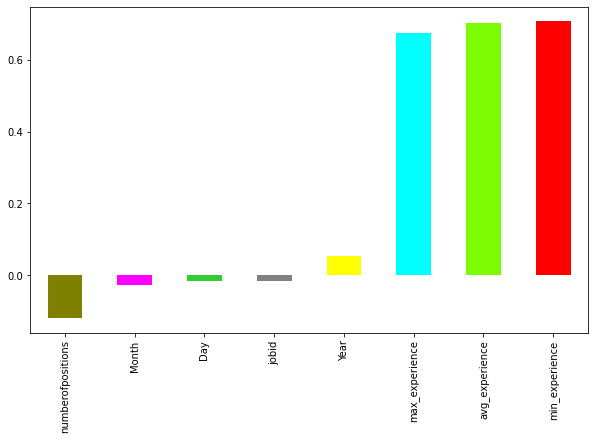

In [52]:
plt.figure(figsize=(10,6))
corr = df.corr()["min_pay"]
corr.sort_values().head(20)[:-3].plot(kind='bar', color= ['olive','fuchsia',
                                                                'limegreen','grey','yellow','aqua',
                                                                'lawngreen','red',])
corr.abs().sort_values(ascending=False)[3:]

### COMPANY BASED ANALYSIS

In [53]:
#display the company names..highest to lowest

com_Category = df.company.str.lstrip().str.rstrip().value_counts().reset_index()
com_Category.columns = ["Company", " Number of Company"]
com_Category = com_Category[:10]
com_Category.style.background_gradient(cmap = "tab20c")

,Company,Number of Company
0,Indian Institute of Technology Bombay,403
1,Confidential,393
2,National Institute of Industrial Engineering,185
3,Oracle India Pvt. Ltd.,151
4,JPMorgan Chase,135
5,Godrej Industries Ltd,125
6,Unitforce technologies Pvt. Ltd.,100
7,Capgemini,98
8,HCL Technologies,95
9,Axis Jobs,92


In [54]:
#pLot of companies

px.pie(com_Category, values=' Number of Company', names='Company', title='Top 10 Companies in India', color_discrete_sequence=px.colors.sequential.RdBu, width=800, height=500, hole=0.3,opacity=0.8)

### INDUSTRY BASED ANALYSIS

In [55]:
# These data shows the biggest industry in the country.

ind_Category = df.industry.str.lstrip().str.rstrip().value_counts().reset_index()
ind_Category.columns = ["Industry", " Number of Industry"]
ind_Category = ind_Category[:10]
ind_Category.style.background_gradient(cmap = "Blues")

,Industry,Number of Industry
0,IT-Software / Software Services,9216
1,Education / Teaching / Training,1322
2,BPO / Call Centre / ITES,1254
3,Banking / Financial Services / Broking,1238
4,Recruitment / Staffing,1129
5,Internet / Ecommerce,738
6,Pharma / Biotech / Clinical Research,525
7,Medical / Healthcare / Hospitals,495
8,Automobile / Auto Anciliary / Auto Components,478
9,Construction / Engineering / Cement / Metals,449


In [56]:
# Plot of Industries.
px.line_polar(ind_Category, r=' Number of Industry', theta='Industry', line_close=True, title='Top 10 Industries in India', color_discrete_sequence=px.colors.sequential.Plasma_r, template="plotly_dark", width=800, height=500)


### JOBTITLE ANALYSIS

In [57]:
#diplay the jobtitle.

Category = df.jobtitle.str.lstrip().str.rstrip().value_counts().reset_index()
Category.columns = ["jobtitle", " Number of Jobtitle"]
Category = Category[:10]
Category.style.background_gradient(cmap = "Greens")

,jobtitle,Number of Jobtitle
0,Business Development Executive,93
1,Business Development Manager,92
2,Software Engineer,81
3,Project Manager,67
4,Android Developer,65
5,Web Designer,61
6,Content Writer,59
7,Senior Software Engineer,58
8,Sales Executive,56
9,PHP Developer,54


In [58]:
#scatter plot for jobtitle.
px.histogram(Category, x='jobtitle', y=' Number of Jobtitle', title='Top 10 Jobtitle in India', color_discrete_sequence=px.colors.sequential.RdBu, width=800, height=500, opacity=0.8, color=' Number of Jobtitle', hover_data=['jobtitle', ' Number of Jobtitle'], labels={'jobtitle':'Jobtitle', ' Number of Jobtitle':'Number of Jobtitle'}, template='plotly_dark')


### SKILL ANALYSIS

In [59]:
# display the skills

# These data shows the biggest industry in the country.

skills_Category = df.skills.str.lstrip().str.rstrip().value_counts().reset_index()
skills_Category.columns = ["Skills", " Number of Skills"]
skills_Category = skills_Category[:10]
skills_Category.style.background_gradient(cmap = "hot")

,Skills,Number of Skills
0,IT Software - Application Programming,5989
1,Sales,2893
2,ITES,1640
3,Teaching,1091
4,HR,928
5,Marketing,868
6,Accounts,860
7,Production,667
8,Medical,418
9,Financial Services,413


In [60]:
# horizontal plot of skills
px.line_polar(skills_Category, r=' Number of Skills', theta='Skills', line_close=True, title='Top 10 Skills in India', color_discrete_sequence=px.colors.sequential.Plasma_r, template="plotly_dark", width=800, height=500)

### TOP CITY FOR JOB LOCATION

In [61]:
# filter and find unique() cities from data set

df_joblocation_address = df.joblocation_address.str.upper()
new_location =df.joblocation_address.str.strip().str.split(",", expand = True)[0].str.split(" ", expand = True)[0].value_counts().reset_index()
new_location.columns = ["Location", "Job_Opportunities"]
new_location = new_location[:10]
new_location.style.background_gradient(cmap = "PuOr")

,Location,Job_Opportunities
0,BANGALORE,7984
1,DELHI,4028
2,MUMBAI,3704
3,HYDERABAD,2659
4,CHENNAI,1743
5,DELHI(NATIONAL,771
6,PUNE,97
7,AHMEDABAD,89
8,FARIDABAD,74
9,NAVI,59


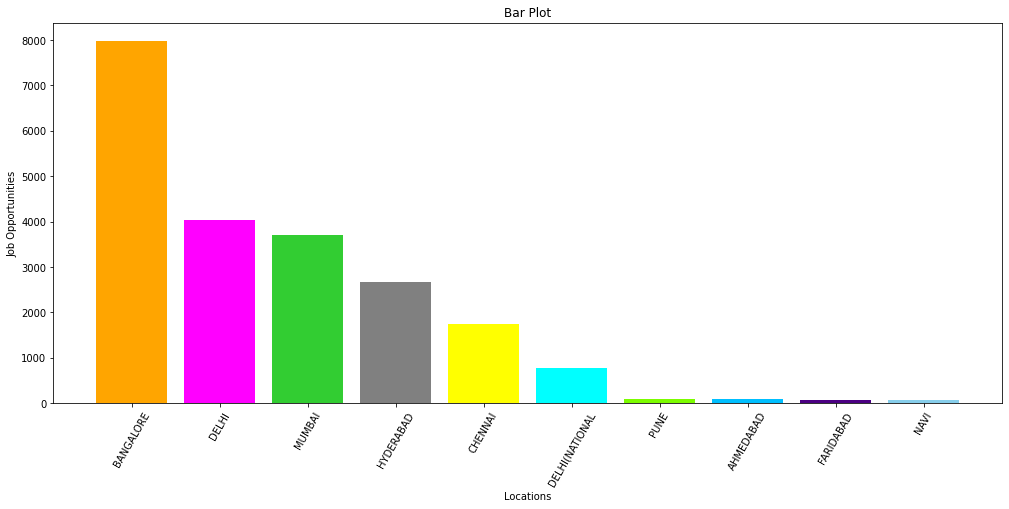

In [62]:
plt.figure(figsize = (17,7))
plt.bar(new_location.Location,new_location.Job_Opportunities,color = ['orange','fuchsia',
                                                                'limegreen','grey','yellow','aqua',
                                                                'lawngreen','deepskyblue','indigo','skyblue'])
plt.xlabel("Locations")
plt.ylabel("Job Opportunities")
plt.xticks(new_location.Location, rotation = "60")
plt.title("Bar Plot")
plt.show()

#### Co-relation Between Minimum Experience and Minimum Payrate

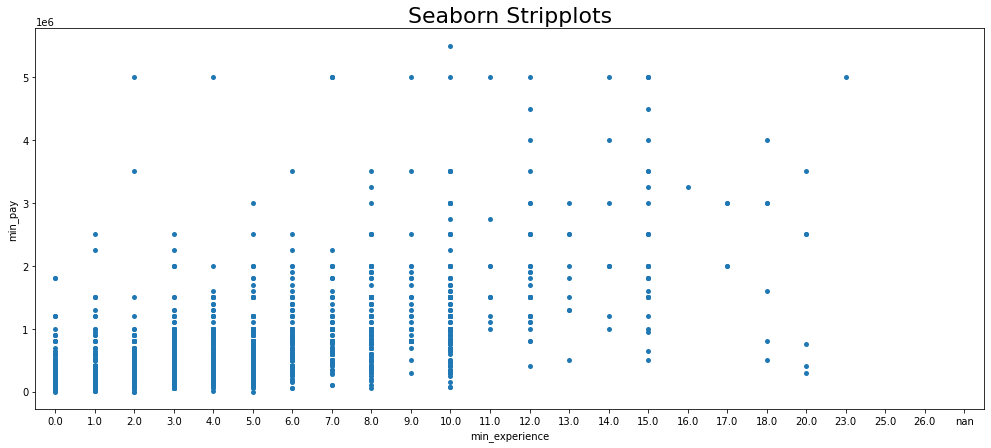

In [63]:
#display the relation between min exp. and min payrate.

f,ax=plt.subplots(figsize=(17,7))
sns.stripplot(x='min_experience', y='min_pay', data=df, jitter=False)
plt.title('Seaborn Stripplots', fontsize=22)
plt.show()

#### Co-relation Between Maximum Experience and Maximum Payrate

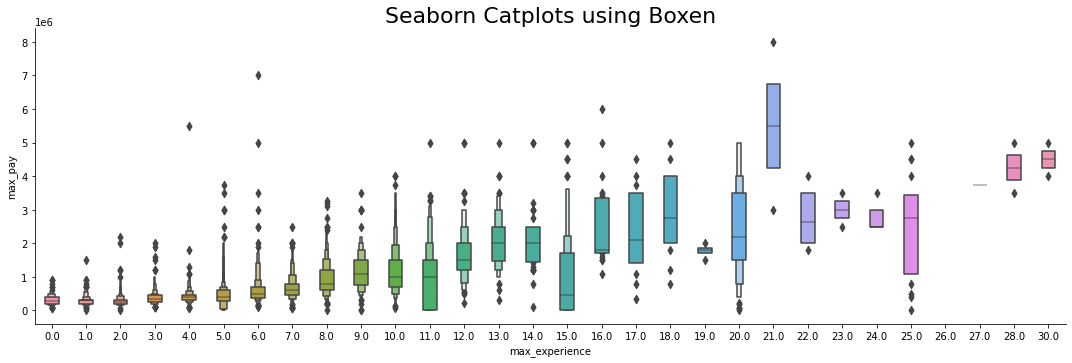

In [64]:
#display the relation between max exp. and max payrate.

sns.catplot(x='max_experience', y='max_pay', data=df , kind="boxen" , width=0.4 ,aspect=3)
plt.title('Seaborn Catplots using Boxen', fontsize=22)
plt.show()

#### Co-relation Between Average Experience And Average Payrate

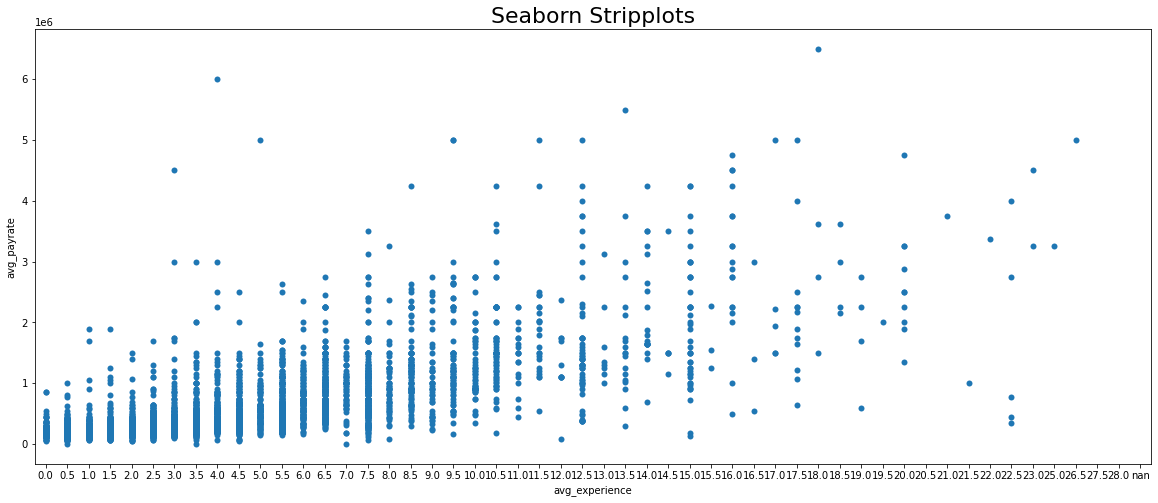

In [65]:
#display the relation between average exp. and average payrate.

f,ax=plt.subplots(figsize=(20,8))
sns.stripplot(x='avg_experience', y='avg_payrate', data=df, jitter=False, size=6)
plt.title('Seaborn Stripplots', fontsize=22)
plt.show()

#### Relation Between Minimum, Maximum Experience And Minimum Payrate

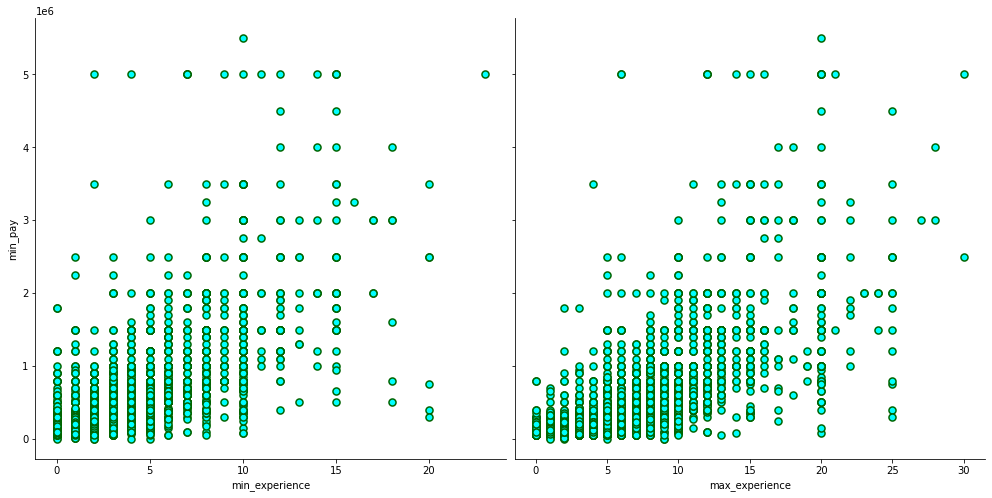

In [66]:
#display the relation between min, max exp. and min payarte.

sns.pairplot(df, size=7,aspect=1,
             x_vars=["min_experience","max_experience"],
             y_vars=["min_pay"], diag_kind="kde", 
             plot_kws=dict(s=50, edgecolor = 'darkgreen', color="aqua", linewidth=1.5),diag_kws=dict(shade=True))

#### Relation Between Minimum , Maximum Experience And Maximum Payrate

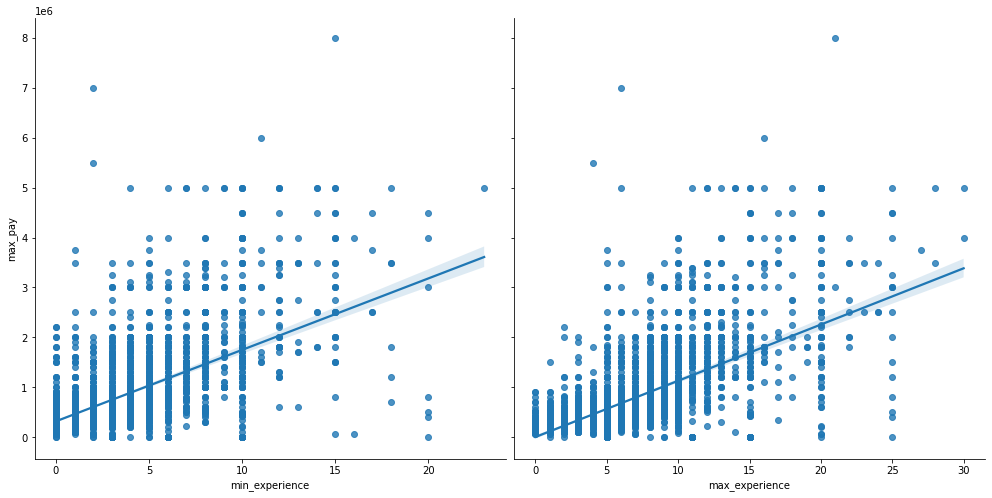

In [67]:
#display the relation between min, max exp. and max payrate.

sns.pairplot(df, 
             size=7, aspect=1, 
             x_vars=["min_experience","max_experience"],
             y_vars=["max_pay"],
             kind="reg")

#### Comparsion Between Maximum Payrates & Industries

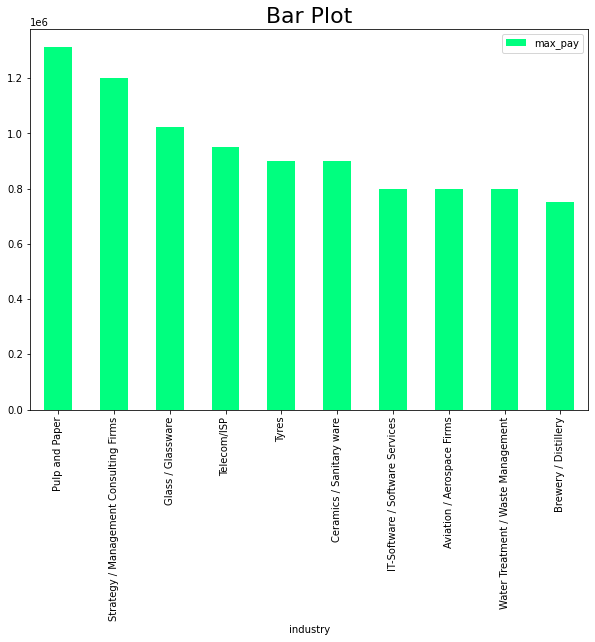

In [68]:
#display the max payrate and industries comparsion.

df[['max_pay','industry']].groupby(["industry"]).median().sort_values(by='max_pay',
                                                                        ascending=False).head(10).plot.bar(color='springgreen')
plt.title('Bar Plot', fontsize=22)
plt.show()

#### Comparsion Between Minimum Payrates & Industries

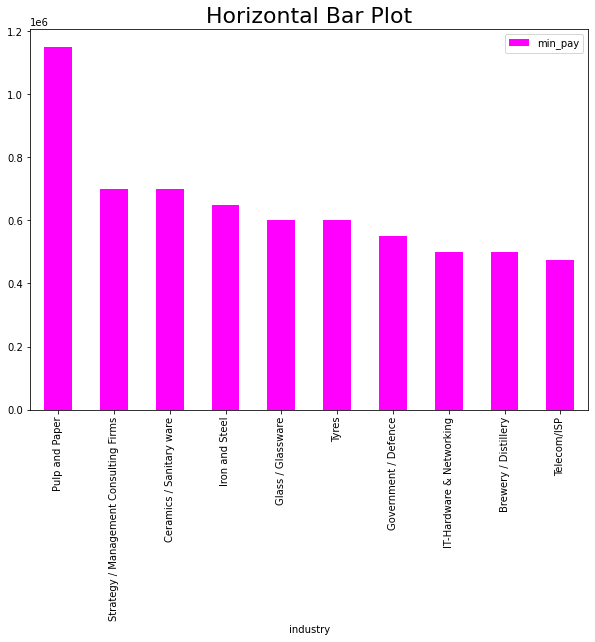

In [69]:
#display the min payrate and industries comparsion.

df[['min_pay','industry']].groupby(["industry"]).median().sort_values(by='min_pay',
                                                                        ascending=False).head(10).plot.bar(color='magenta')
plt.title('Horizontal Bar Plot', fontsize=22)
plt.show()

#### Comparsion Between Average Payrates & Skills

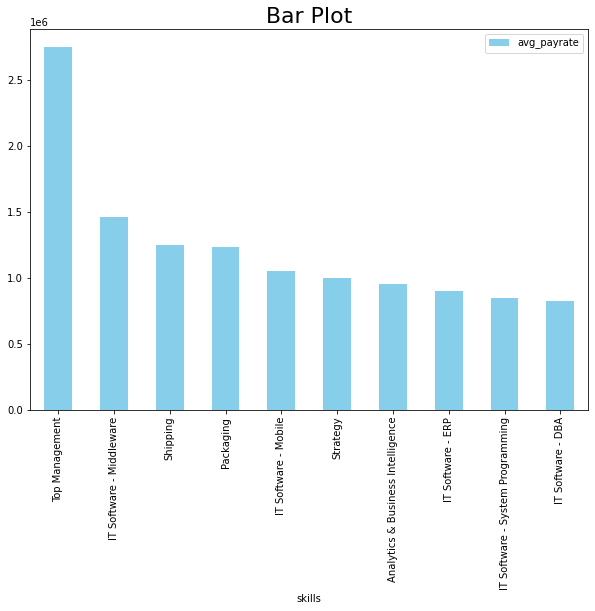

In [70]:
#display the average payrate and skills comparsion.

df[['avg_payrate','skills']].groupby(["skills"]).median().sort_values(by='avg_payrate',
                                                                  ascending=False).head(10).plot.bar(color='skyblue')
plt.title('Bar Plot', fontsize=22)
plt.show()

#### Comparsion Between Average Payrates & Jobtitles

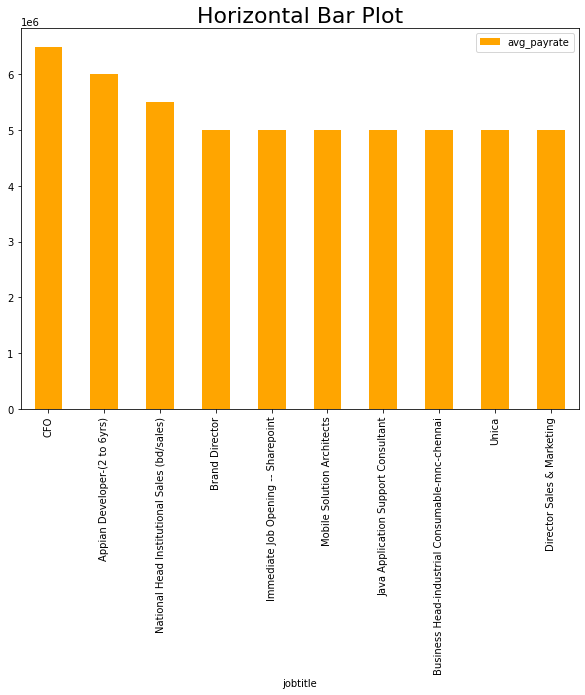

In [71]:
df[['avg_payrate','jobtitle']].groupby(["jobtitle"]).median().sort_values(by='avg_payrate',
                                                                        ascending=False).head(10).plot.bar(color='orange')
plt.title('Horizontal Bar Plot', fontsize=22)
plt.show()

#### Display The Number Of Position On Minimum Payrate

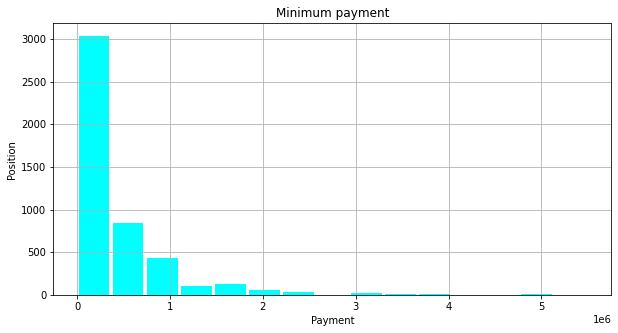

In [72]:
# Position are available in minimum payrate

plt.figure(figsize=(10, 5))
df['min_pay'].hist(rwidth=0.9, bins=15, color='aqua')
plt.title('Minimum payment')
plt.xlabel('Payment')
plt.ylabel('Position')
plt.show()

#### Display The Number Of Position On Maximum Payrate

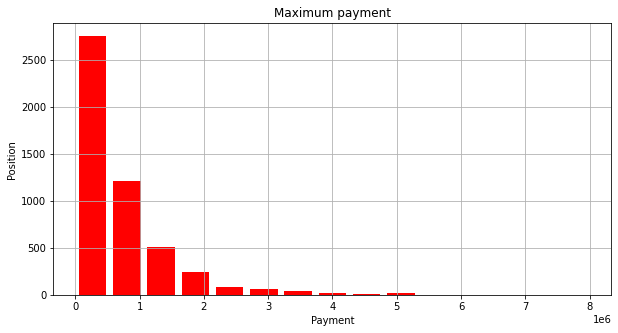

In [73]:
# Position are available in maximum payrate
plt.figure(figsize=(10, 5))
df['max_pay'].hist(rwidth=0.8, bins=15, color='r')
plt.title('Maximum payment')
plt.xlabel('Payment')
plt.ylabel('Position')

plt.show()

#### Display The Available Position In The Industry

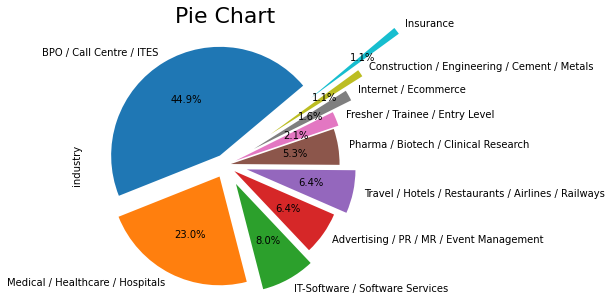

In [74]:
# Number of position are available in the industry.

max_positions = df.loc[df.numberofpositions > 100].loc[:,['numberofpositions','industry']]
plt.figure(figsize=(15, 5))
explode =(0.1,0.12,0.2,0.1,0.2,0.05,0.1,0.3,0.5,1)
hist_position_value = pd.value_counts(max_positions.industry)
hist_position_value.index
hist_position_value[hist_position_value >1].plot(kind='pie',startangle=40,explode=explode, autopct='%1.1f%%')
plt.title('Pie Chart', fontsize=22)
plt.show()

Conclusion

In short, according to given data, Most of the jobs on Naukri.com are related IT and software industry which are hiring for programming and design role category and Most of the job recruiters are from Bengeluru region.

The Information Technology & Information Technology Enabled Services (IT-ITeS) sector has rapid evolution and is changing the shape of Indian business/technology standards. It includes software development, consultancies, software management, online services and business process outsourcing (BPO).

And According data, analysis that information technology and Software service industry are most valuable indsutry in the country

We analysis that the management skills is the most highly offered salary in the industry